<a href="https://colab.research.google.com/github/thekaszsz/ML_book/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv("continuous_factory_process.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14088 entries, 0 to 14087
Columns: 116 entries, time_stamp to Stage2.Output.Measurement14.U.Setpoint
dtypes: float64(108), int64(7), object(1)
memory usage: 12.5+ MB


In [4]:
df.info

<bound method DataFrame.info of                 time_stamp  AmbientConditions.AmbientHumidity.U.Actual  \
0      2019-03-06 10:52:33                                       17.24   
1      2019-03-06 10:52:34                                       17.24   
2      2019-03-06 10:52:35                                       17.24   
3      2019-03-06 10:52:36                                       17.24   
4      2019-03-06 10:52:37                                       17.24   
...                    ...                                         ...   
14083  2019-03-06 14:47:16                                       13.84   
14084  2019-03-06 14:47:17                                       13.84   
14085  2019-03-06 14:47:18                                       13.84   
14086  2019-03-06 14:47:19                                       13.84   
14087  2019-03-06 14:47:20                                       13.84   

       AmbientConditions.AmbientTemperature.U.Actual  \
0                      

In [5]:
df.describe()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
count,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,...,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,1.408800e+04,14088.00,14088.000000,1.408800e+04
mean,15.330759,23.843635,11.851256,205.676320,951.679815,248.868896,1242.764276,72.013330,72.013106,70.333111,...,7.535958e+00,7.930000e+00,5.416515e+00,5.650000e+00,1.972561e+00,1.850000e+00,3.535251e+00,2.89,7.515574,1.171000e+01
std,1.188993,0.373535,0.510309,11.606324,126.662010,3.297820,95.845946,0.063183,0.406313,5.525217,...,1.645785e+00,3.552840e-15,1.182333e+00,8.882099e-16,4.145398e-01,4.441050e-16,4.768244e-01,0.00,2.082948,1.776420e-15
min,13.840000,23.020000,11.540000,200.000000,601.110000,247.000000,231.300000,71.900000,71.300000,44.400000,...,-5.220420e-95,7.930000e+00,-2.703210e-95,5.650000e+00,-6.200020e-96,1.850000e+00,-1.822810e-95,2.89,-3.437021,1.171000e+01
25%,14.040000,23.530000,11.540000,200.000000,963.000000,247.000000,1257.170000,72.000000,71.600000,68.880000,...,7.840000e+00,7.930000e+00,5.560000e+00,5.650000e+00,2.030000e+00,1.850000e+00,3.450000e+00,2.89,7.720000,1.171000e+01
50%,15.120000,23.930000,11.540000,200.000000,963.000000,247.000000,1264.440000,72.000000,72.000000,71.980000,...,7.900000e+00,7.930000e+00,5.630000e+00,5.650000e+00,2.060000e+00,1.850000e+00,3.510000e+00,2.89,7.870000,1.171000e+01
75%,16.630000,24.160000,12.220000,201.000000,1027.430000,251.000000,1273.460000,72.000000,72.400000,72.920000,...,7.950000e+00,7.930000e+00,5.800000e+00,5.650000e+00,2.090000e+00,1.850000e+00,3.760000e+00,2.89,8.080000,1.171000e+01
max,17.240000,24.430000,12.900000,236.000000,1048.060000,257.000000,1331.820000,72.500000,72.700000,88.530000,...,8.590000e+00,7.930000e+00,6.320000e+00,5.650000e+00,5.200000e+00,1.850000e+00,8.000000e+00,2.89,14.260000,1.171000e+01


In [6]:
df.head()

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


In [77]:
mac = list(df.columns)
mac

['time_stamp',
 'AmbientConditions.AmbientHumidity.U.Actual',
 'AmbientConditions.AmbientTemperature.U.Actual',
 'Machine1.RawMaterial.Property1',
 'Machine1.RawMaterial.Property2',
 'Machine1.RawMaterial.Property3',
 'Machine1.RawMaterial.Property4',
 'Machine1.RawMaterialFeederParameter.U.Actual',
 'Machine1.Zone1Temperature.C.Actual',
 'Machine1.Zone2Temperature.C.Actual',
 'Machine1.MotorAmperage.U.Actual',
 'Machine1.MotorRPM.C.Actual',
 'Machine1.MaterialPressure.U.Actual',
 'Machine1.MaterialTemperature.U.Actual',
 'Machine1.ExitZoneTemperature.C.Actual',
 'Machine2.RawMaterial.Property1',
 'Machine2.RawMaterial.Property2',
 'Machine2.RawMaterial.Property3',
 'Machine2.RawMaterial.Property4',
 'Machine2.RawMaterialFeederParameter.U.Actual',
 'Machine2.Zone1Temperature.C.Actual',
 'Machine2.Zone2Temperature.C.Actual',
 'Machine2.MotorAmperage.U.Actual',
 'Machine2.MotorRPM.C.Actual',
 'Machine2.MaterialPressure.U.Actual',
 'Machine2.MaterialTemperature.U.Actual',
 'Machine2.ExitZ

In [45]:
mac1 = df.filter(like='Machine1')

In [46]:
mac1

,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual
0,11.54,200,963.00,247,1241.26,72.0,72.3,48.03,10.48,436.76,76.3,75.1
1,11.54,200,963.00,247,1246.09,72.0,72.3,48.03,10.48,436.77,76.3,75.1
2,11.54,200,963.00,247,1246.29,72.0,72.3,48.16,10.48,425.46,76.3,75.1
3,11.54,200,963.00,247,1247.59,72.0,72.3,48.57,10.48,437.01,76.3,75.1
4,11.54,200,963.00,247,1252.83,72.1,72.4,48.57,10.48,425.18,76.4,75.1
...,...,...,...,...,...,...,...,...,...,...,...,...
14083,12.22,201,1048.06,252,1263.76,72.0,71.8,73.46,12.21,424.53,83.7,80.0
14084,12.22,201,1048.06,252,1255.42,72.0,71.8,73.32,12.17,426.73,83.7,80.0
14085,12.22,201,1048.06,252,1257.52,72.0,71.8,73.59,12.14,429.77,83.7,80.0
14086,12.22,201,1048.06,252,1261.99,72.0,71.9,74.40,12.21,431.36,83.7,80.0


In [47]:
mac2 = df.filter(like='Machine2')
mac2

,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,Machine2.Zone1Temperature.C.Actual,Machine2.Zone2Temperature.C.Actual,Machine2.MotorAmperage.U.Actual,Machine2.MotorRPM.C.Actual,Machine2.MaterialPressure.U.Actual,Machine2.MaterialTemperature.U.Actual,Machine2.ExitZoneTemperature.C.Actual
0,12.59,236,601.11,257,200.75,69.37,69.06,73.25,13.89,246.68,68.8,60.1
1,12.59,236,601.11,257,220.16,69.35,69.05,73.19,13.89,246.02,69.0,60.0
2,12.59,236,601.11,257,216.84,69.37,69.07,73.19,13.85,247.18,68.9,60.0
3,12.59,236,601.11,257,208.61,69.38,69.08,72.81,13.90,249.92,69.1,59.9
4,12.59,236,601.11,257,212.31,69.40,69.07,73.00,13.89,250.58,68.9,59.9
...,...,...,...,...,...,...,...,...,...,...,...,...
14083,12.85,241,556.70,256,208.51,69.00,69.09,73.44,13.87,227.02,77.2,60.0
14084,12.85,241,556.70,256,224.93,68.99,69.06,73.31,13.86,223.55,77.2,60.0
14085,12.85,241,556.70,256,207.35,68.97,69.05,73.94,13.85,222.52,77.2,60.0
14086,12.85,241,556.70,256,213.12,68.98,69.06,73.81,13.89,224.02,77.2,60.0


In [48]:
mac3 = df.filter(like='Machine3')
mac3

,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.Zone1Temperature.C.Actual,Machine3.Zone2Temperature.C.Actual,Machine3.MotorAmperage.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,Machine3.ExitZoneTemperature.C.Actual
0,9.02,186,421.16,200,203.95,78.2,78.4,337.40,13.50,263.71,65.3,65.0
1,9.02,186,421.16,200,213.36,78.1,78.4,341.85,13.59,262.88,65.3,65.0
2,9.02,186,421.16,200,225.25,78.1,78.5,338.71,14.00,262.63,65.3,65.0
3,9.02,186,421.16,200,213.99,78.1,78.5,339.15,13.67,262.22,65.4,65.0
4,9.02,186,421.16,200,200.86,78.0,78.5,337.05,13.72,262.17,65.4,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14083,8.83,221,433.18,205,195.22,78.0,78.1,337.50,12.04,248.18,74.9,64.9
14084,8.83,221,433.18,205,225.15,78.0,78.1,342.43,12.32,248.20,74.9,64.9
14085,8.83,221,433.18,205,210.46,78.0,78.1,334.89,12.18,248.92,74.9,64.9
14086,8.83,221,433.18,205,188.43,78.0,78.1,342.03,12.27,248.23,74.9,64.9


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

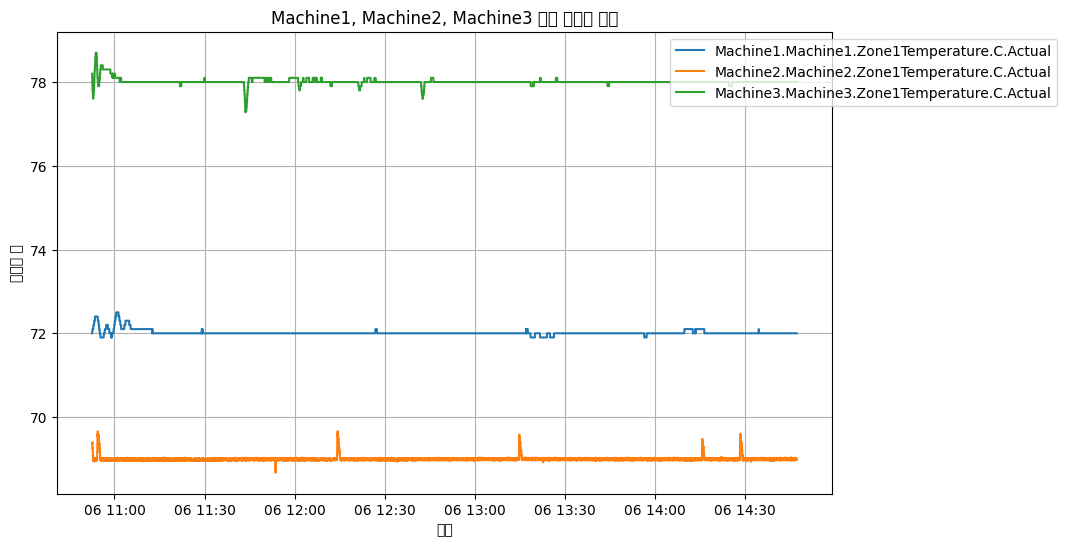

In [78]:
# 'Machine1', 'Machine2', 'Machine3'의 원본 데이터 추출
machine1_data = df.filter(like='Machine1.Zone1Temperature.C.Actual')
machine2_data = df.filter(like='Machine2.Zone1Temperature.C.Actual')
machine3_data = df.filter(like='Machine3.Zone1Temperature.C.Actual')

# 시간 열을 'YYYY-MM-DD' 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'], format='%Y-%m-%d %H:%M:%S')

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Machine1, Machine2, Machine3 원본 데이터 비교')
plt.xlabel('시간')
plt.ylabel('데이터 값')

# 'Machine1'의 열 그래프 그리기
for column in machine1_data.columns:
    plt.plot(df['time_stamp'], machine1_data[column], label=f'Machine1.{column}')

# 'Machine2'의 열 그래프 그리기
for column in machine2_data.columns:
    plt.plot(df['time_stamp'], machine2_data[column], label=f'Machine2.{column}')

# 'Machine3'의 열 그래프 그리기
for column in machine3_data.columns:
    plt.plot(df['time_stamp'], machine3_data[column], label=f'Machine3.{column}')

# 범례 표시
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# 결과 출력
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

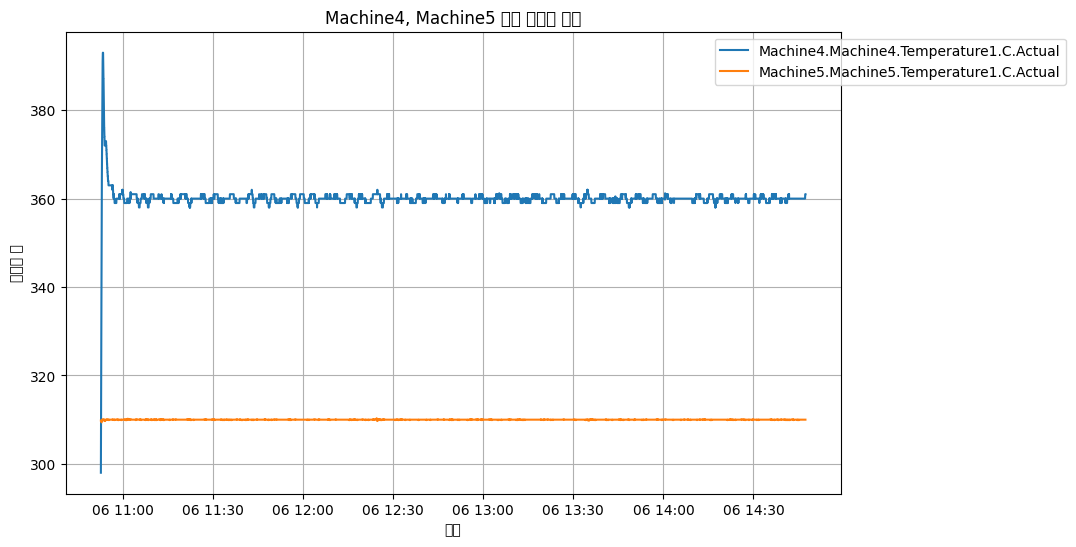

In [80]:
# 'Machine4', 'Machine5'의 원본 데이터 추출
machine4_data = df.filter(like='Machine4.Temperature1.C.Actual')
machine5_data = df.filter(like='Machine5.Temperature1.C.Actual')

# 시간 열을 'YYYY-MM-DD' 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'], format='%Y-%m-%d %H:%M:%S')

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Machine4, Machine5 원본 데이터 비교')
plt.xlabel('시간')
plt.ylabel('데이터 값')

# 'Machine4'의 열 그래프 그리기
for column in machine4_data.columns:
    plt.plot(df['time_stamp'], machine4_data[column], label=f'Machine4.{column}')

# 'Machine5'의 열 그래프 그리기
for column in machine5_data.columns:
    plt.plot(df['time_stamp'], machine5_data[column], label=f'Machine5.{column}')


# 범례 표시
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# 결과 출력
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

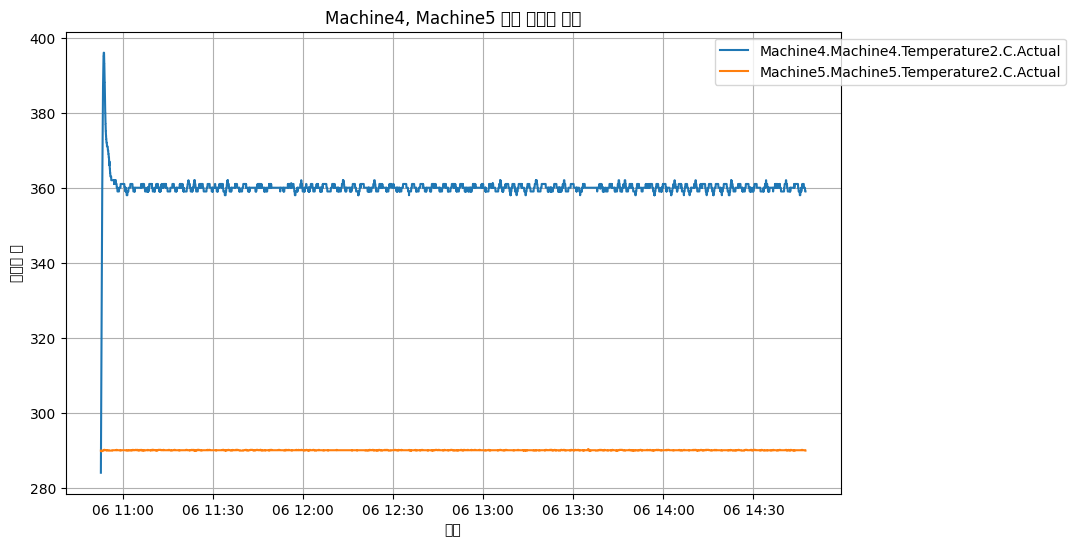

In [81]:
# 'Machine4', 'Machine5'의 원본 데이터 추출
machine4_data = df.filter(like='Machine4.Temperature2.C.Actual')
machine5_data = df.filter(like='Machine5.Temperature2.C.Actual')

# 시간 열을 'YYYY-MM-DD' 형식으로 변환
df['time_stamp'] = pd.to_datetime(df['time_stamp'], format='%Y-%m-%d %H:%M:%S')

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Machine4, Machine5 원본 데이터 비교')
plt.xlabel('시간')
plt.ylabel('데이터 값')

# 'Machine4'의 열 그래프 그리기
for column in machine4_data.columns:
    plt.plot(df['time_stamp'], machine4_data[column], label=f'Machine4.{column}')

# 'Machine5'의 열 그래프 그리기
for column in machine5_data.columns:
    plt.plot(df['time_stamp'], machine5_data[column], label=f'Machine5.{column}')


# 범례 표시
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# 결과 출력
plt.grid(True)
plt.show()


<ipython-input-91-7ab103fc85fd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S')
<ipython-input-91-7ab103fc85fd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S')
<ipython-input-91-7ab103fc85fd>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

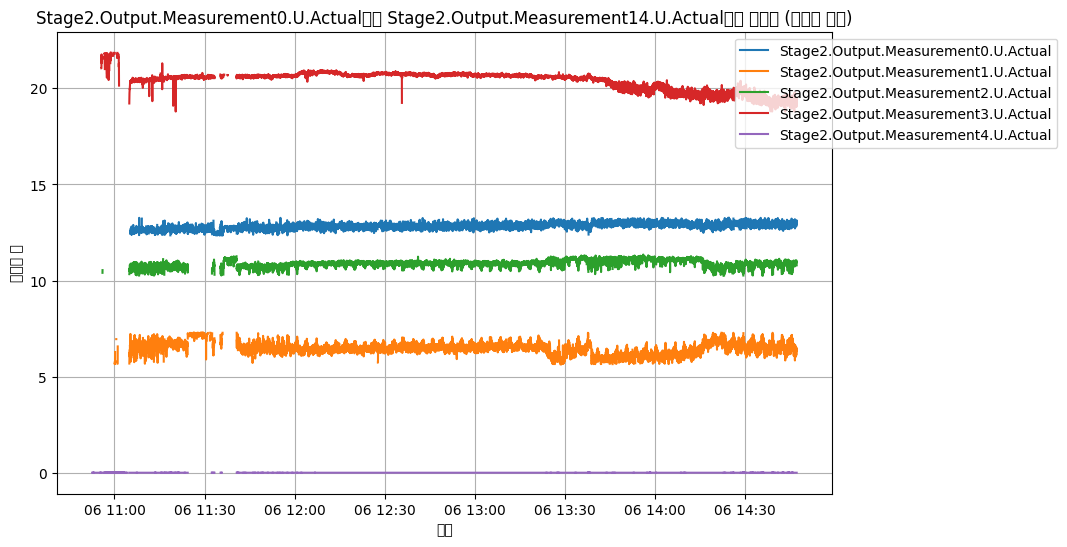

In [91]:
# 열 이름 패턴 생성
column_pattern = 'Stage2.Output.Measurement{}.U.Actual'

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Stage2.Output.Measurement0.U.Actual부터 Stage2.Output.Measurement14.U.Actual까지 데이터 (이상치 제거)')
plt.xlabel('시간')
plt.ylabel('데이터 값')

# 이상치 제거를 위한 함수 정의
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# 열 이름 반복 및 이상치 제거 및 그래프 그리기
for i in range(5):
    column_name = column_pattern.format(i)
    data = df[['time_stamp', column_name]]
    data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S')
    data = data.sort_values(by='time_stamp')

    # 이상치 제거
    data[column_name] = remove_outliers(data[column_name])

    plt.plot(data['time_stamp'], data[column_name], label=column_name)

# 범례 표시
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# 결과 출력
plt.grid(True)
plt.show()


<ipython-input-92-0e12823ce308>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S')
<ipython-input-92-0e12823ce308>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S')
<ipython-input-92-0e12823ce308>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

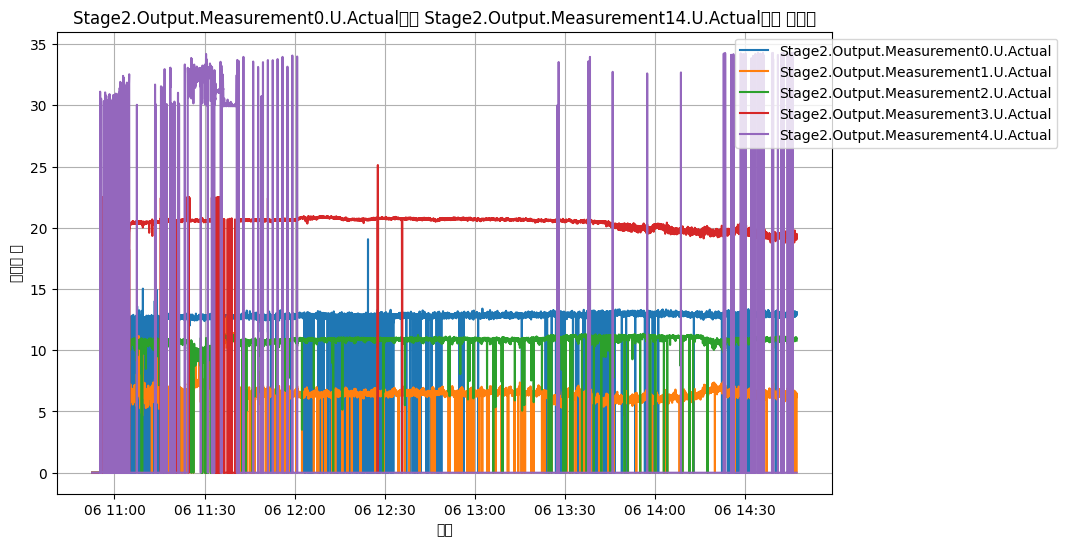

In [92]:
# 열 이름 패턴 생성
column_pattern = 'Stage2.Output.Measurement{}.U.Actual'

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.title('Stage2.Output.Measurement0.U.Actual부터 Stage2.Output.Measurement14.U.Actual까지 데이터')
plt.xlabel('시간')
plt.ylabel('데이터 값')

# 열 이름 반복 및 그래프 그리기
for i in range(5):
    column_name = column_pattern.format(i)
    data = df[['time_stamp', column_name]]
    data['time_stamp'] = pd.to_datetime(data['time_stamp'], format='%Y-%m-%d %H:%M:%S')
    data = data.sort_values(by='time_stamp')
    plt.plot(data['time_stamp'], data[column_name], label=column_name)

# 범례 표시
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# 결과 출력
plt.grid(True)
plt.show()
